# Univariate, Missing Values and Outliers

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
# load data and get some insight
pdata = pd.read_csv("bank-full.csv")
pdata.head()


age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [4]:
unique_values = pdata.nunique()
print('Count unique values in each column')
print(unique_values)

Count unique values in each column
age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64


In [5]:
pdata.describe().transpose()

count         mean          std     min    25%    50%     75%  \
age       45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance   45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day       45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration  45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign  45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays     45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous  45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

               max  
age           95.0  
balance   102127.0  
day           31.0  
duration    4918.0  
campaign      63.0  
pdays        871.0  
previous     275.0

*Look at the data we can see we have outliers for balance, pdays and duration*

In [6]:
# check for null value
pdata.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

*Base on the sumarize above, we do not see we have any bad or missing data.*

In [7]:
pdata.shape

(45211, 17)

In [8]:
pdata['Target'].value_counts()

no     39922
yes     5289
Name: Target, dtype: int64

In [51]:
pdata['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
 181      117
 370       99
 184       85
 364       77
 95        74
 350       73
 94        72
 175       71
 185       68
 93        65
 343       65
 188       64
 189       60
 186       60
 174       57
 96        57
 349       57
 363       55
 97        54
 90        54
 196       51
 365       51
 368       49
 342       49
 98        49
        ...  
 774        1
 550        1
 396        1
 492        1
 466        1
 45         1
 434        1
 18         1
 529        1
 465        1
 401        1
 784        1
 656        1
 592        1
 528        1
 464        1
 432        1
 655        1
 495        1
 543        1
 47         1
 782        1
 686        1
 558        1
 526        1
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

*We notice the pdays is so imbalanced, if we train without fixing this the model would be biased*

In [9]:
pdata['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

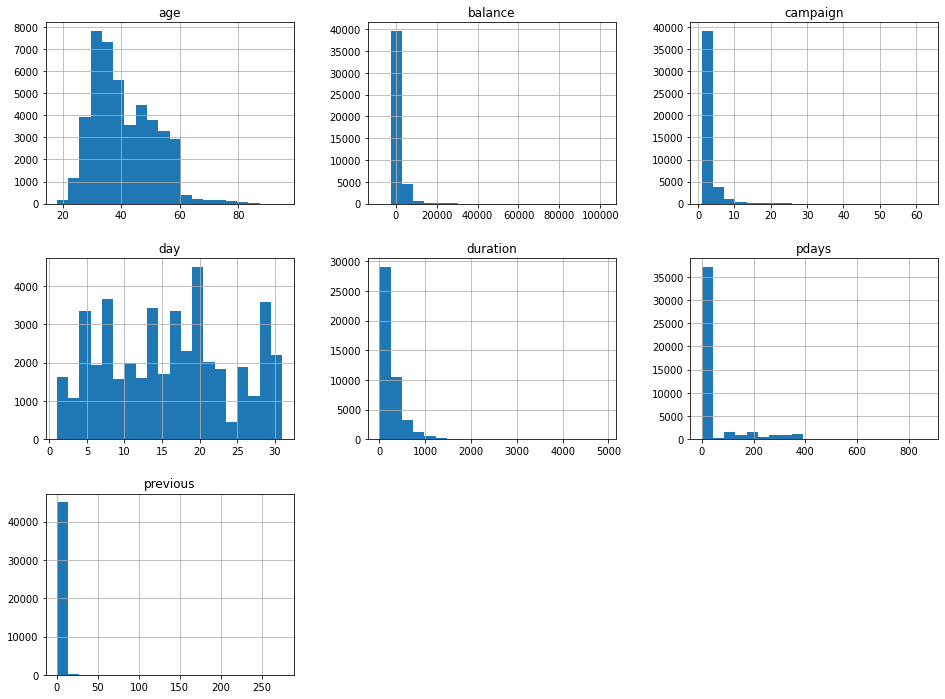

In [11]:
pdata.hist(bins=20, figsize=(16,12))
plt.show()

In [12]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [13]:
# Clean duration ouliers
pdata_clean = remove_outlier(pdata,'duration')
pdata_clean.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [14]:
pdata_clean = remove_outlier(pdata_clean, 'balance')
pdata_clean.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no

In [15]:
# I noticed there some outliers which has value > 50 so filter those out
pdata_clean = pdata_clean[pdata_clean['previous'] < 50] 

In [16]:
pdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37567 entries, 0 to 45210
Data columns (total 17 columns):
age          37567 non-null int64
job          37567 non-null object
marital      37567 non-null object
education    37567 non-null object
default      37567 non-null object
balance      37567 non-null int64
housing      37567 non-null object
loan         37567 non-null object
contact      37567 non-null object
day          37567 non-null int64
month        37567 non-null object
duration     37567 non-null int64
campaign     37567 non-null int64
pdays        37567 non-null int64
previous     37567 non-null int64
poutcome     37567 non-null object
Target       37567 non-null object
dtypes: int64(7), object(10)
memory usage: 5.2+ MB


In [17]:
def countplot(label, using_hue=False):
    plt.figure(figsize=(15,5))
    total = len(pdata_clean[label])
    
    if using_hue:
        ax = sns.countplot(x=label, data=pdata_clean, hue='Target')
    else:
        ax = sns.countplot(x=label, data=pdata_clean)
    for p in ax.patches:
        ax.annotate('{:.1f}%'.format(100 * p.get_height()/total), (p.get_x() + 0.1, p.get_height() + 5))
    ax.yaxis.set_ticks(np.linspace(0, total, 11))
    ax.set_yticklabels(map('{:.1f}%'.format, 100 * ax.yaxis.get_majorticklocs()/total))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
    plt.show()

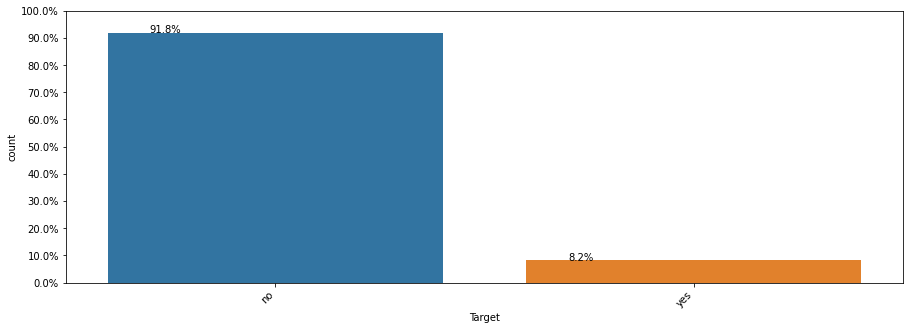

In [89]:
countplot('Target')

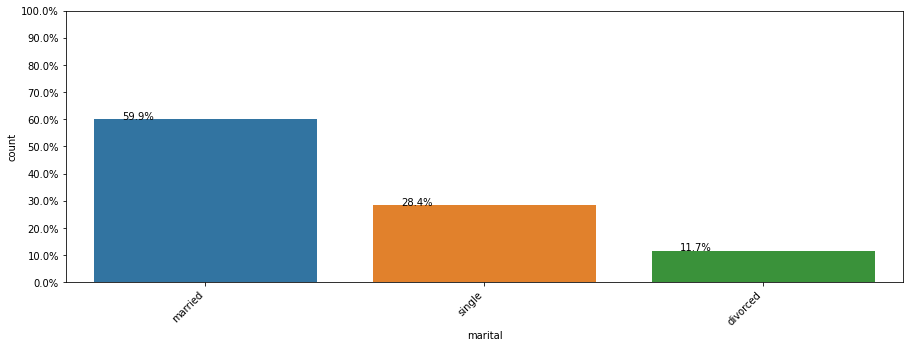

In [18]:
# Count by marital
countplot("marital")

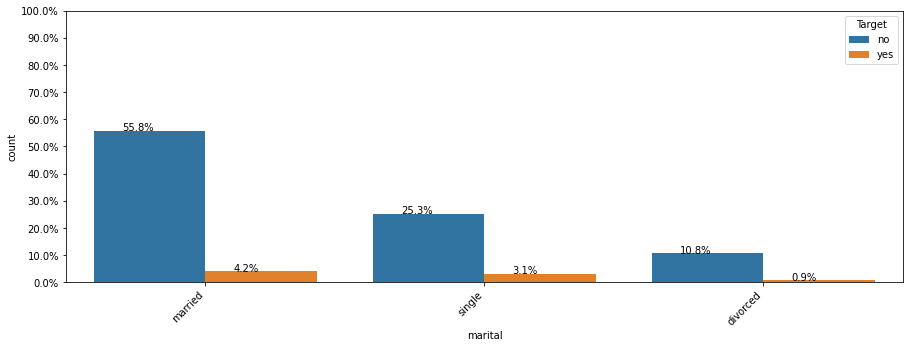

In [20]:
# included target so we can see how marital might impact Target
countplot("marital", True)

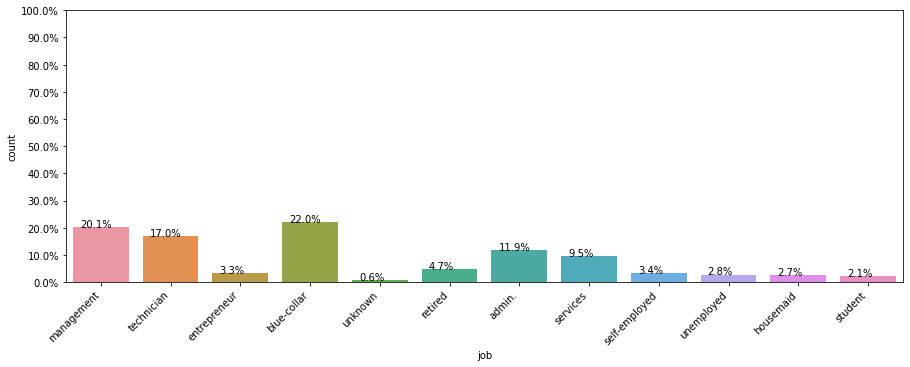

In [21]:
# Count by job
countplot("job")

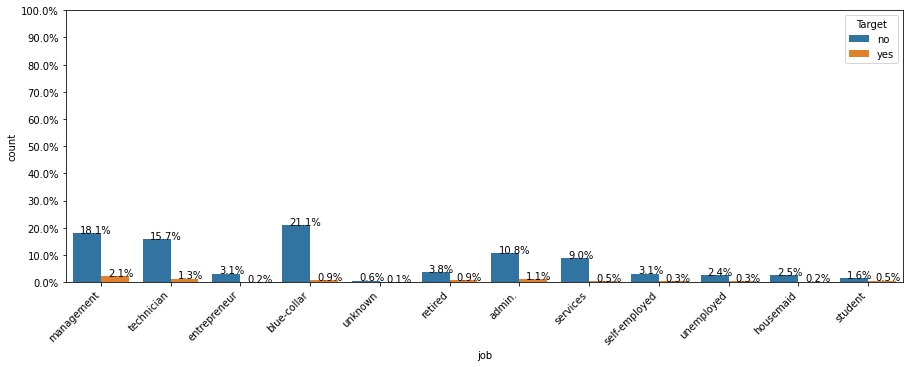

In [22]:
# included target so we can see how job might impact Target
countplot('job', True)

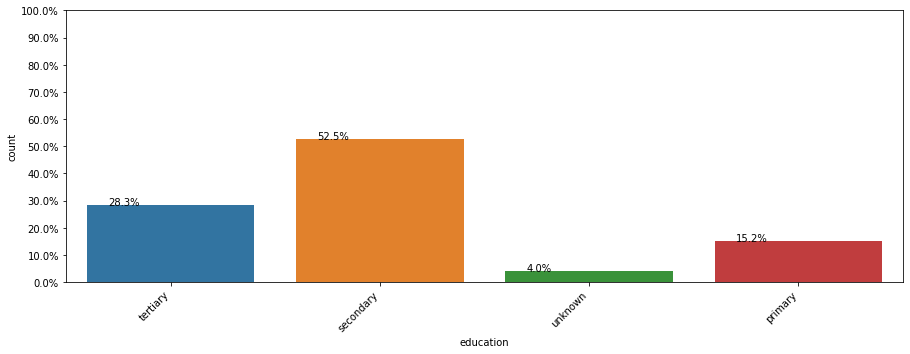

In [23]:
countplot("education")

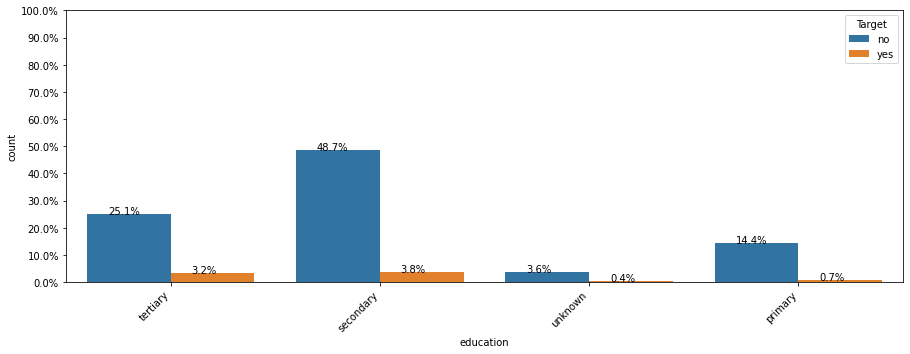

In [24]:
# included target so we can see how education might impact Target
countplot("education", True)

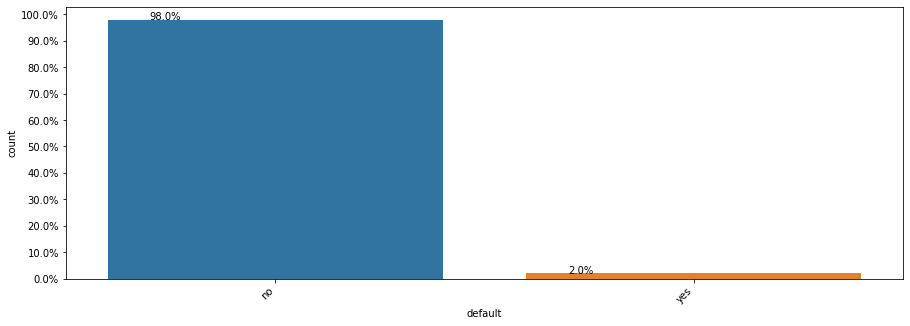

In [25]:
countplot('default')

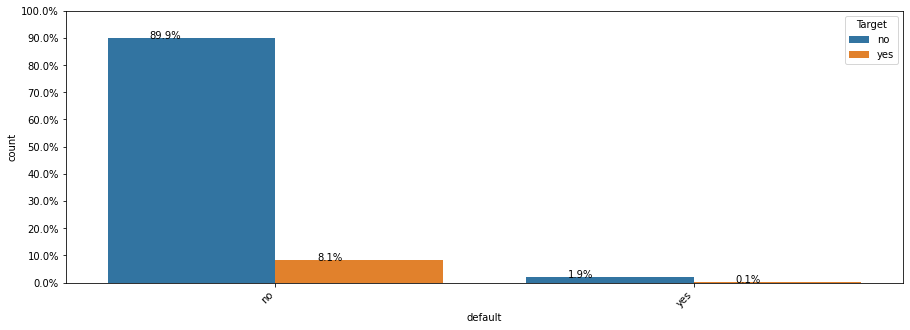

In [26]:
# included target so we can see how default might impact Target
countplot('default', True)

*From above chart we can tell default (has credit or not) play an important role for customers to subscribe to term deposit*

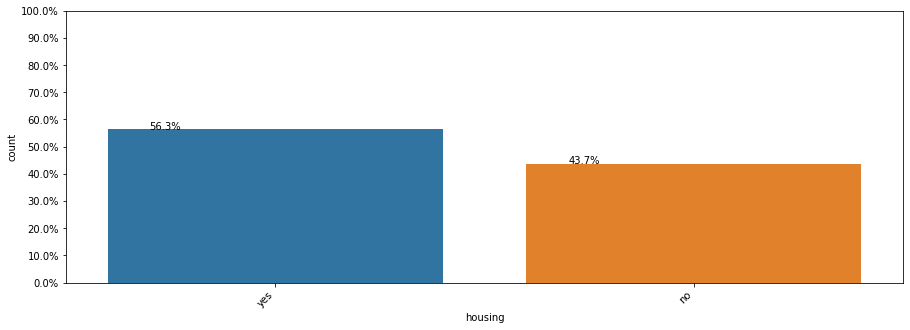

In [27]:
countplot('housing')

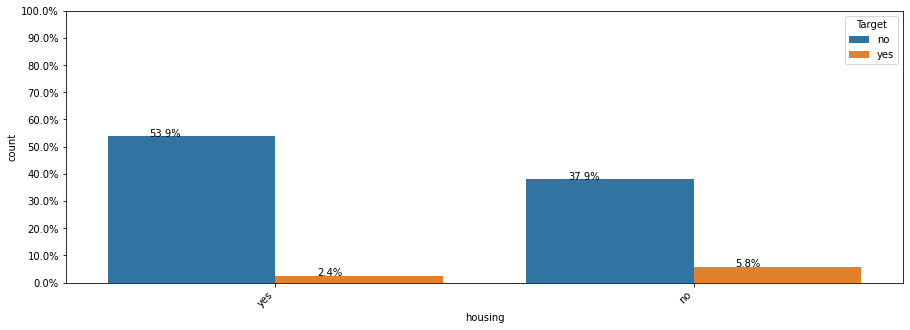

In [28]:
# included target so we can see how housing might impact Target
countplot('housing', True)

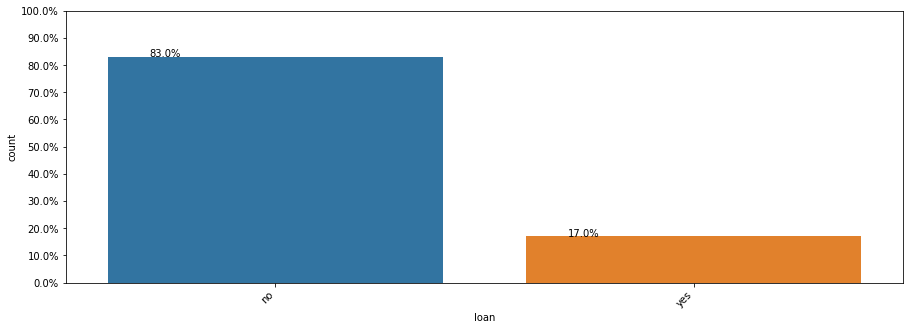

In [29]:
countplot('loan')

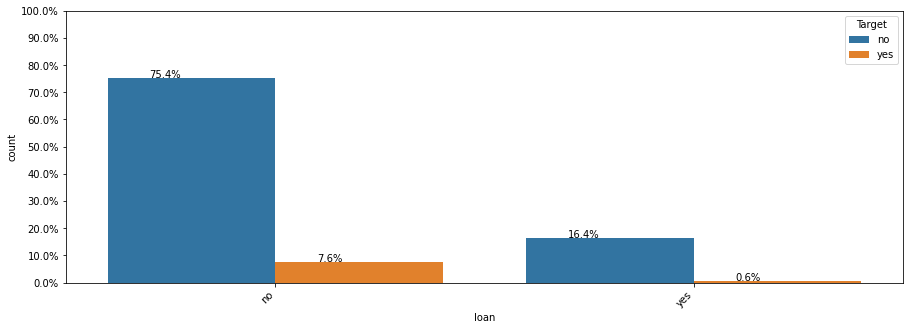

In [30]:
countplot('loan', True)

*From above we can see loan is an important feature to tell customers subscribe to term deposit or not*

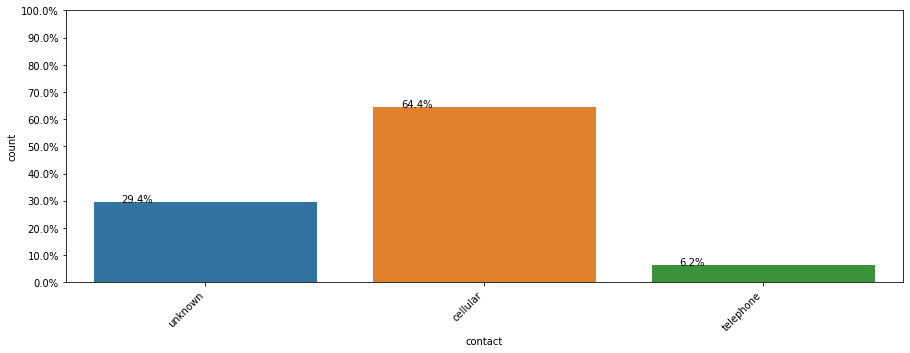

In [31]:
countplot('contact')

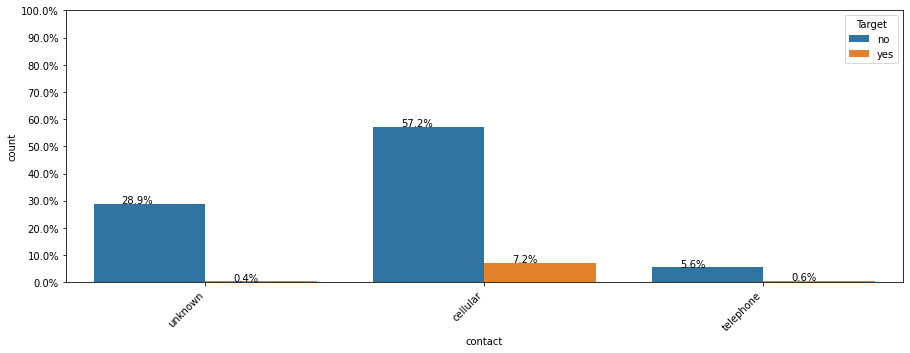

In [32]:
countplot('contact', True)

*From above chart we can tell contact customer by cell play an important role to tell customers subscribe to term or not*

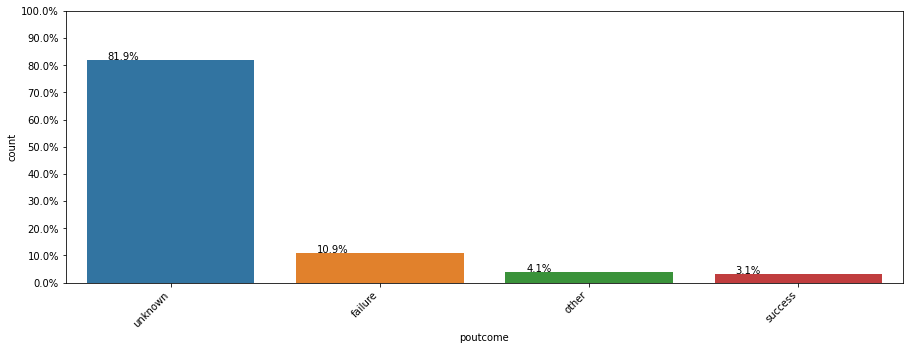

In [33]:
countplot('poutcome')

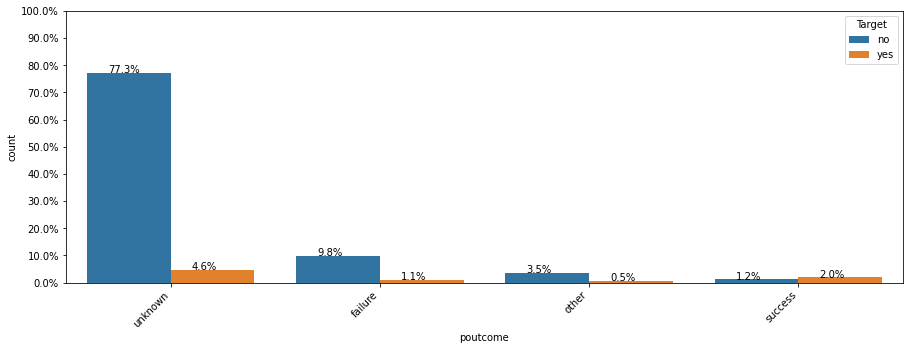

In [34]:
countplot('poutcome', True)

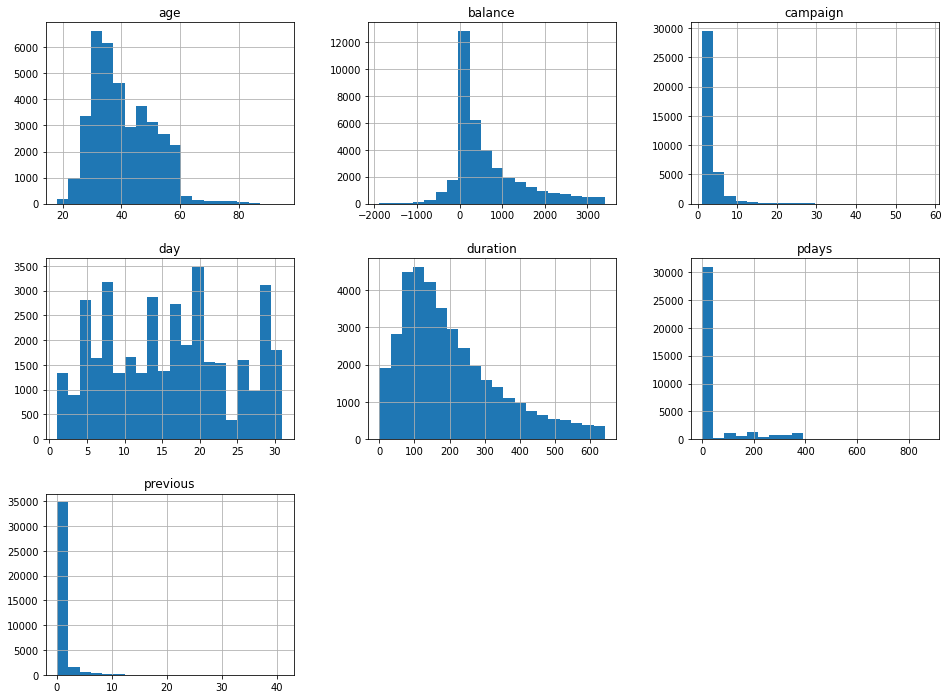

In [35]:
pdata_clean.hist(bins=20, figsize=(16,12))
plt.show()

# Bivariate

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


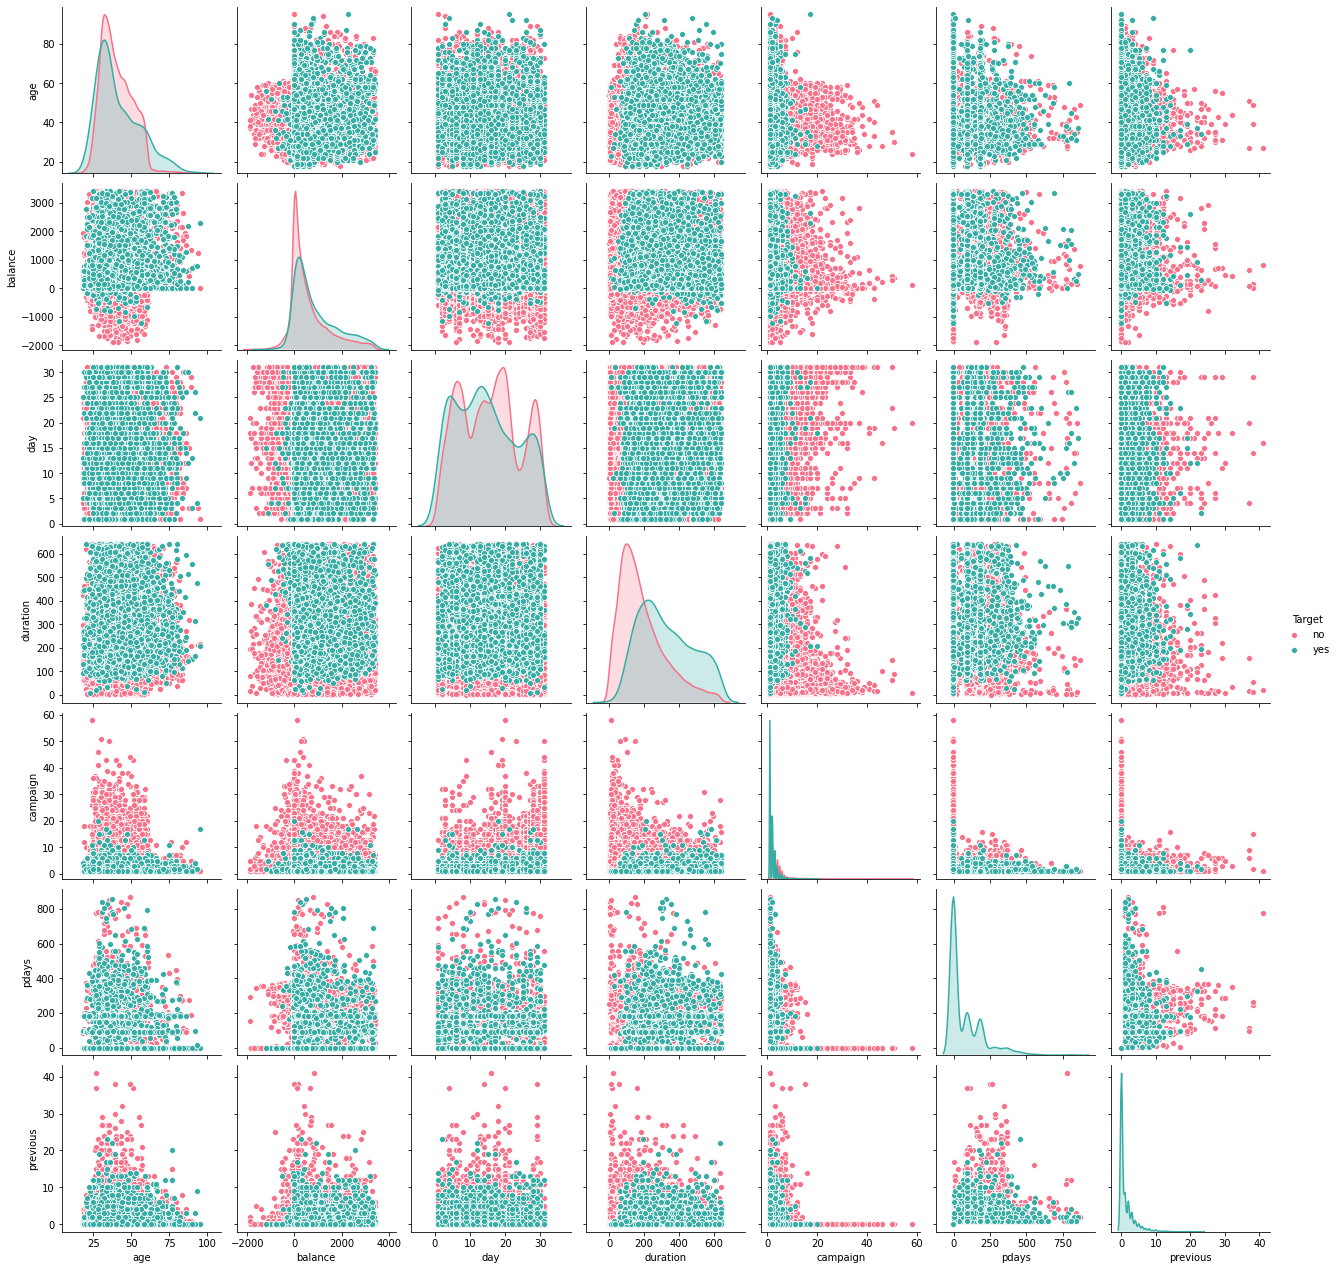

In [107]:
sns.pairplot(pdata_clean, hue="Target", palette="husl")

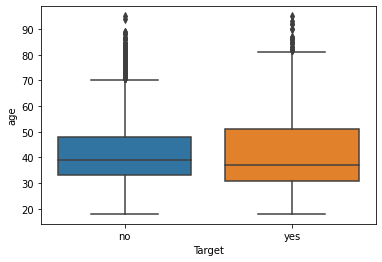

In [36]:
sns.boxplot(x='Target', y='age', data=pdata_clean)

*From above chart, we can see most of customers subscribe or not are between 30-50 years old and seem they have overlapped, so age is not a good feature to include into our training model* 

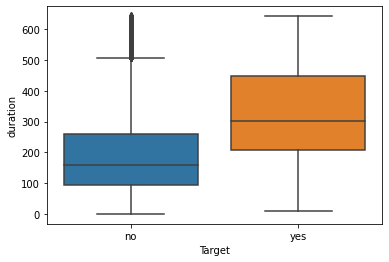

In [37]:
sns.boxplot(x='Target', y='duration', data=pdata_clean)

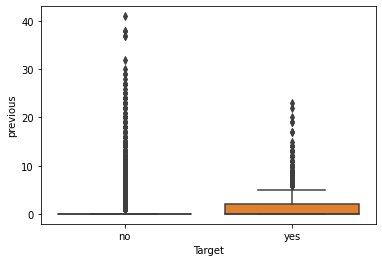

In [38]:
sns.boxplot(x='Target', y='previous', data=pdata_clean)

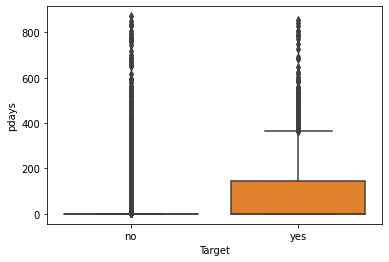

In [39]:
sns.boxplot(x='Target', y='pdays', data=pdata_clean)

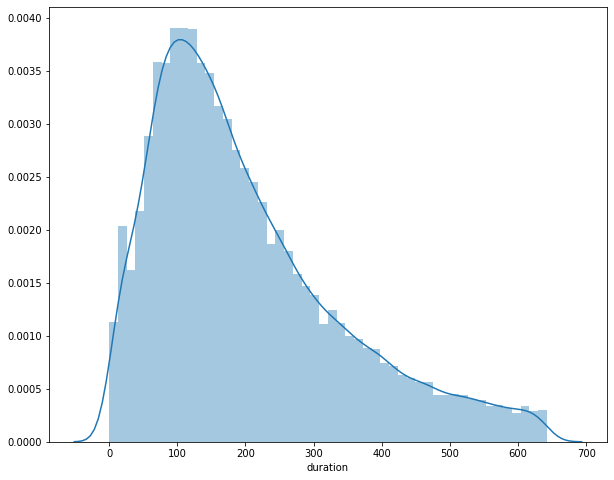

In [112]:
plt.figure(figsize=(10,8))
sns.distplot(pdata_clean["duration"])
plt.show()

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

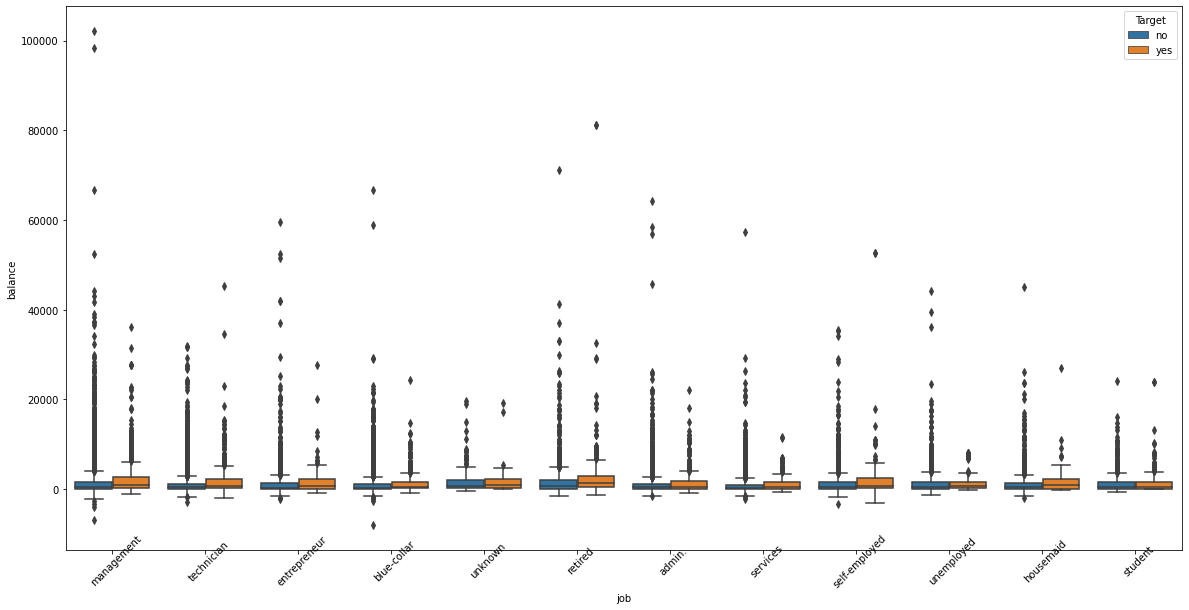

In [40]:
fig = plt.figure(figsize=(20,10))
fig1 = sns.boxplot(x="job", y="balance", hue="Target", data=pdata)
fig1.set_xticklabels(pdata_clean["job"].unique(), rotation=45, rotation_mode="anchor")


[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar')]

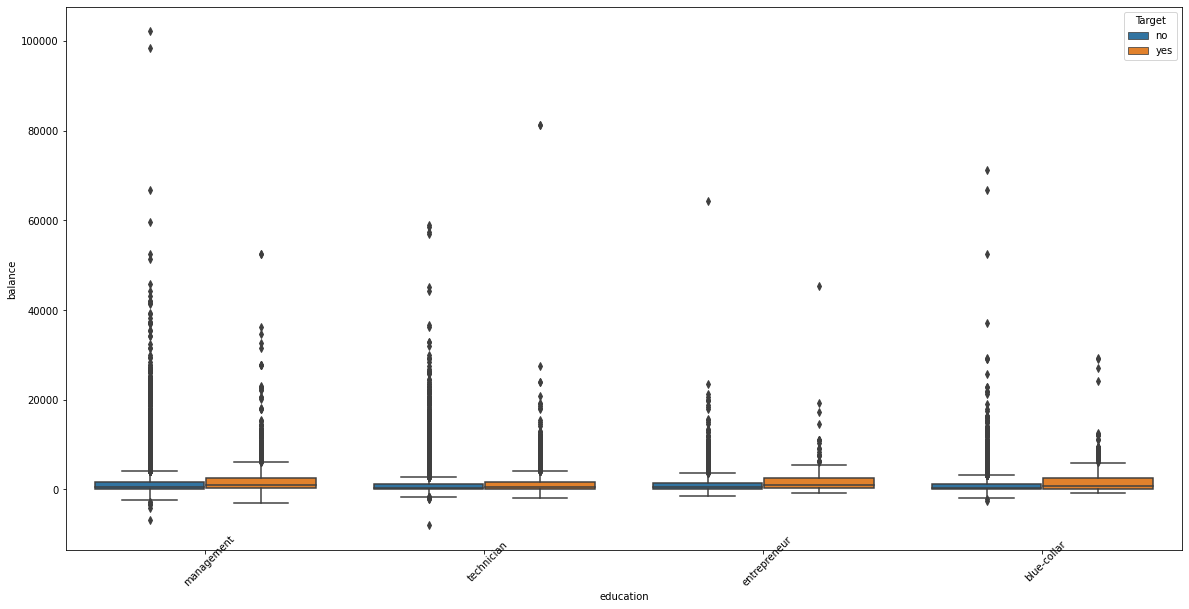

In [41]:
fig = plt.figure(figsize=(20,10))
fig2 = sns.boxplot(x="education", y="balance", hue="Target", data=pdata)
fig2.set_xticklabels(pdata_clean["job"].unique(), rotation=45, rotation_mode="anchor")


[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

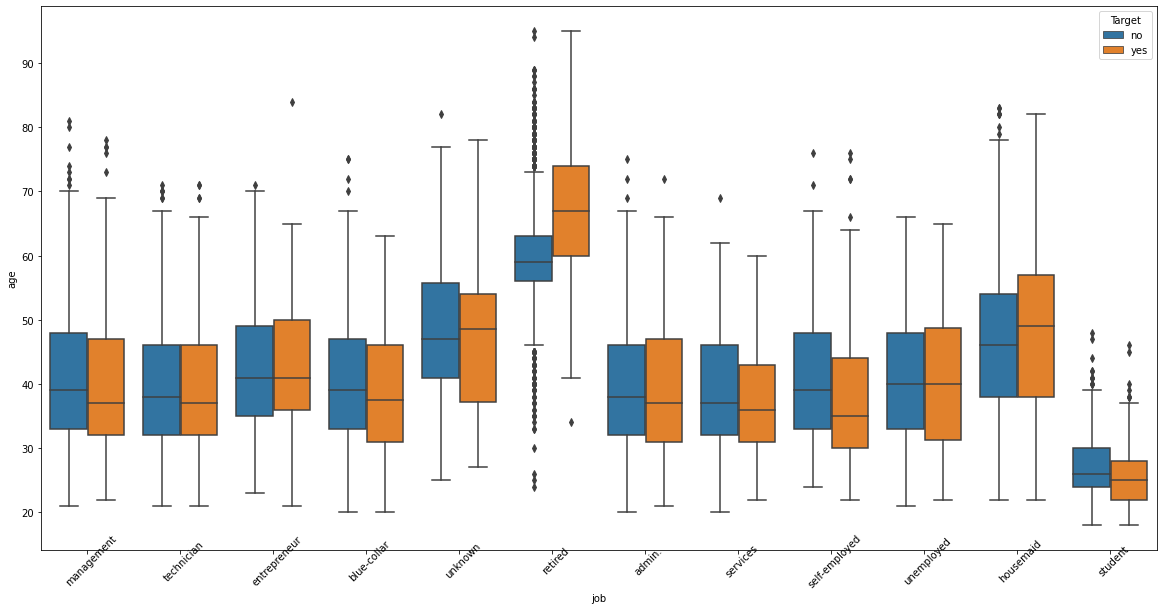

In [116]:
fig = plt.figure(figsize=(20,10))
fig3 = sns.boxplot(x="job", y="age", hue="Target", data=pdata)
fig3.set_xticklabels(pdata["job"].unique(), rotation=45, rotation_mode="anchor")

*I notice retired and student are out of normal range*

[Text(0, 0, 'married'), Text(0, 0, 'single'), Text(0, 0, 'divorced')]

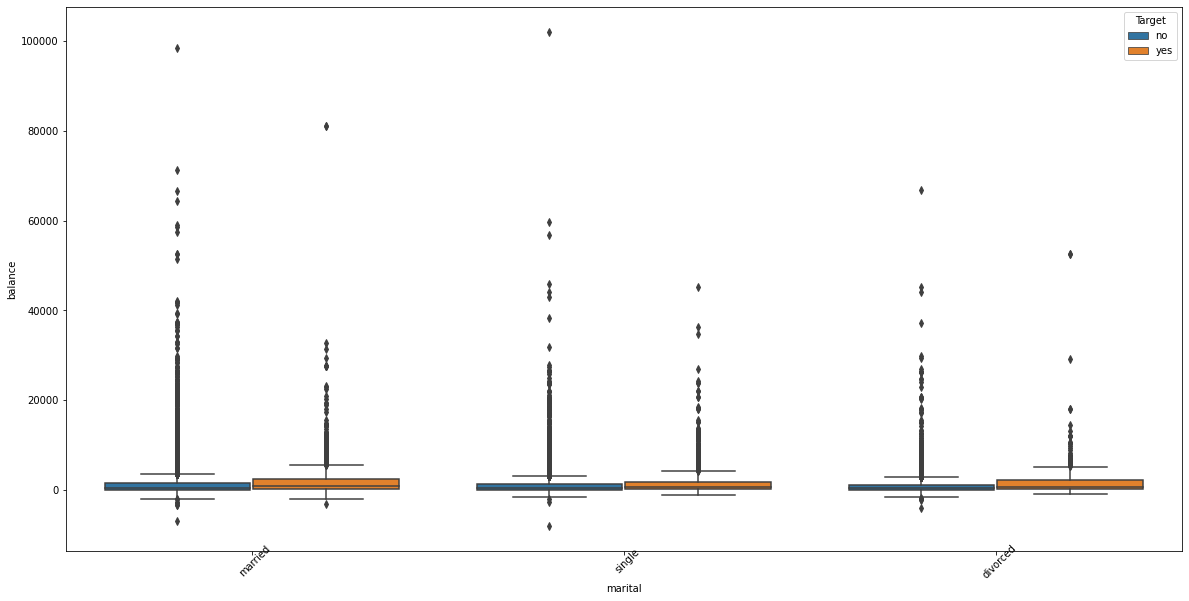

In [42]:
fig = plt.figure(figsize=(20,10))
fig4 = sns.boxplot(x="marital", y="balance", hue="Target", data=pdata)
fig4.set_xticklabels(pdata_clean["marital"].unique(), rotation=45, rotation_mode="anchor")

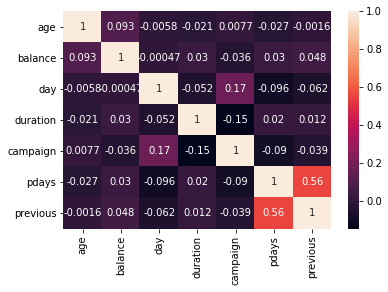

In [43]:
corr_matrix = pdata_clean.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

*Look at the correlation matrix for those numerical features, we can see there is a high correlation of pdays and previous compare with the rest, we can try to drop it and see if the prediction score improve*

# Prepare Data for analysis	

In [44]:

pdata_clean.replace({'no': 0, 'yes': 1 }, inplace=True)
pdata_clean.head()


age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day month  duration  campaign  pdays  previous poutcome  Target  
0  unknown    5   may       261         1     -1         0  unknown       0  
1  unknown    5   may       151         1     -1         0  unknown       0  
2  unknown    5   may        76         1     -1         0  unknown       0  
3  unknown    5   may        92         1     -1         0  unknown       0  
4  unknown    5   may       198         1     -1         0  unknown       0

In [45]:
pdata_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37567 entries, 0 to 45210
Data columns (total 17 columns):
age          37567 non-null int64
job          37567 non-null object
marital      37567 non-null object
education    37567 non-null object
default      37567 non-null int64
balance      37567 non-null int64
housing      37567 non-null int64
loan         37567 non-null int64
contact      37567 non-null object
day          37567 non-null int64
month        37567 non-null object
duration     37567 non-null int64
campaign     37567 non-null int64
pdays        37567 non-null int64
previous     37567 non-null int64
poutcome     37567 non-null object
Target       37567 non-null int64
dtypes: int64(11), object(6)
memory usage: 6.4+ MB


In [46]:
pdata_model = pd.get_dummies(pdata_clean, drop_first=True)
pdata_model.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
0   58        0     2143        1     0    5       261         1     -1   
1   44        0       29        1     0    5       151         1     -1   
2   33        0        2        1     1    5        76         1     -1   
3   47        0     1506        1     0    5        92         1     -1   
4   33        0        1        0     0    5       198         1     -1   

   previous        ...         month_jul  month_jun  month_mar  month_may  \
0         0        ...                 0          0          0          1   
1         0        ...                 0          0          0          1   
2         0        ...                 0          0          0          1   
3         0        ...                 0          0          0          1   
4         0        ...                 0          0          0          1   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          0          0               0                 0   
1          0          0          0               0                 0   
2          0          0          0               0                 0   
3          0          0          0               0                 0   
4          0          0          0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 43 columns]

In [47]:
X = pdata_model.drop('Target', axis=1)
Y = pdata_model['Target'].astype('category')

# Log Reg & Decision Tree

In [48]:
# Split data to train, test with ratio 70/30
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
X_train.head()

age  default  balance  housing  loan  day  duration  campaign  pdays  \
30290   39        0      829        0     0    5       336         1     -1   
7695    37        0     1513        0     0   30       510         1     -1   
16374   48        0     -460        0     0   23       135         1     -1   
35993   36        0     -355        1     0    8        89         1     -1   
9019    43        0      522        0     0    5        86         1     -1   

       previous        ...         month_jul  month_jun  month_mar  month_may  \
30290         0        ...                 0          0          0          0   
7695          0        ...                 0          0          0          1   
16374         0        ...                 1          0          0          0   
35993         0        ...                 0          0          0          1   
9019          0        ...                 0          1          0          0   

       month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
30290          0          0          0               0                 0   
7695           0          0          0               0                 0   
16374          0          0          0               0                 0   
35993          0          0          0               0                 0   
9019           0          0          0               0                 0   

       poutcome_unknown  
30290                 1  
7695                  1  
16374                 1  
35993                 1  
9019                  1  

[5 rows x 42 columns]

In [49]:
# fit logistic regression model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, Y_train)
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)
model_score = model.score(X_test, Y_test)
print(model_score)

0         1         2         3         4         5         6  \
0 -0.002558  0.055848  0.000165 -0.902362 -0.572987  0.005546  0.006482   

          7         8         9    ...            33       34       35  \
0 -0.134813 -0.000151  0.022211    ...      0.383831  1.69023 -0.70109   

         36        37        38        39        40        41  intercept  
0 -1.081836  0.605936  0.808083  0.021808  2.352838 -0.249784  -2.506263  

[1 rows x 43 columns]
0.9269807470499511


In [50]:
from sklearn import tree
dTree = tree.DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, Y_train)
print(dTree.score(X_train, Y_train))
print(dTree.score(X_test, Y_test))

1.0
0.9005412119598971


In [51]:
# Test accuracy for LogReg
y_pred_df_logReg = pd.DataFrame()

y_pred_df_logReg['actual'] = Y_test

y_pred_df_logReg["predicted_prob"] = model.predict_proba(X_test)[:,1]

y_pred_df_logReg['predicted'] = y_pred_df_logReg.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'

y_pred_df_logReg[0:5]

actual  predicted_prob  predicted
25540      0        0.116230          0
26152      0        0.414123          0
27148      0        0.048477          0
34694      0        0.177624          0
41748      0        0.352789          0

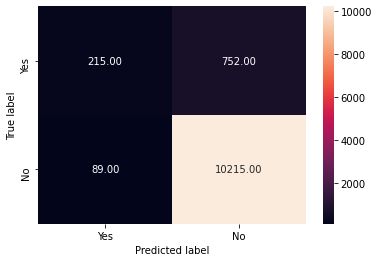

In [52]:
# Evaluating model performance by using confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm(y_pred_df_logReg.actual, y_pred_df_logReg.predicted)

In [53]:
# Test accuracy for DecisionTree
y_pred_df_dTree = pd.DataFrame()

y_pred_df_dTree['actual'] = Y_test

y_pred_df_dTree["predicted_prob"] = dTree.predict_proba(X_test)[:,1]

y_pred_df_dTree['predicted'] = y_pred_df_dTree.predicted_prob.map( lambda x: 1 if x > 0.6 else 0)
# Converted values which are above 0.6 as '1' and rest as '0'

y_pred_df_dTree[0:5]

actual  predicted_prob  predicted
25540      0             0.0          0
26152      0             1.0          1
27148      0             0.0          0
34694      0             0.0          0
41748      0             0.0          0

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass labels=[1, 0] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


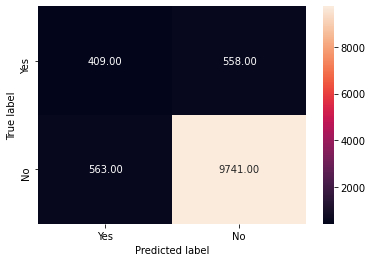

In [132]:
# Evaluating model performance by using confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels = ["Yes", "No"] , yticklabels = ["Yes", "No"] )
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
draw_cm(y_pred_df_dTree.actual, y_pred_df_dTree.predicted)

# Ensemble Model (3 atleast)	

In [65]:
# RandomForest
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(criterion = 'entropy', class_weight={0:.5,1:.5}, max_depth = 5, min_samples_leaf=5)
rfcl = rfcl.fit(X_train, Y_train)
test_pred = rfcl.predict(X_test)
rfcl.score(X_test , Y_test)
rf_score = rfcl.score(X_test , Y_test)


In [66]:
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators= 20)
abcl = abcl.fit(X_train, Y_train)

test_pred = abcl.predict(X_train)
abcl.score(X_test , Y_test)
abcl_score = abcl.score(X_test , Y_test)

In [67]:
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier(n_estimators=20, max_samples= .7, bootstrap=True)
bgcl = bgcl.fit(X_train, Y_train)
test_pred = bgcl.predict(X_test)
bgcl.score(X_test , Y_test)
bgcl_score = bgcl.score(X_test , Y_test)

In [68]:
data = {'Name': ['RandomForest', 'AdaBoost', 'Bagging'],
            'Score': [rf_score, abcl_score, bgcl_score]} 
df_summary = pd.DataFrame(data)
df_summary.head()

Name     Score
0  RandomForest  0.922811
1      AdaBoost  0.928045
2       Bagging  0.927957

# Conclusion